**How to preprocess and prepare the data for sentiment analysis?**

In [1]:
# Import necessary libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import cchardet

# Load Arabic Twitter dataset
def load_dataset(data_path):
    texts = []
    labels = []
    for label in ["positive", "negative"]:
        folder_path = os.path.join(data_path, label)
        for filename in os.listdir(folder_path):
            with open(os.path.join(folder_path, filename), "rb") as file:
                rawdata = file.read()
                result = cchardet.detect(rawdata)
                encoding = result['encoding']
            with open(os.path.join(folder_path, filename), "r", encoding=encoding) as file:
                text = file.read()
                texts.append(text)
                labels.append(1 if label == "positive" else 0)
    return pd.DataFrame({"text": texts, "label": labels})

# Set path to your dataset
data_path = "/content/drive/MyDrive/Colab Notebooks/Twitter"
df = load_dataset(data_path)

# Tokenize and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)


**How to load the CAMeLBERT-CA SA model for sentiment analysis?**

In [2]:
# Import necessary libraries
from transformers import pipeline

# Load the CAMeLBERT-CA SA model
sa_model_name = "CAMeL-Lab/bert-base-arabic-camelbert-ca-sentiment"
sa = pipeline('text-classification', model=sa_model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**How to tokenize and encode the text data for input to the CAMeLBERT-CA SA model?**

In [3]:
# Import necessary libraries
from transformers import AutoTokenizer

# Tokenize and encode the text data
tokenizer = AutoTokenizer.from_pretrained(sa_model_name)
X_train_encoded = tokenizer(X_train.tolist(), truncation=True, padding=True, return_tensors="pt")
X_test_encoded = tokenizer(X_test.tolist(), truncation=True, padding=True, return_tensors="pt")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


**How to make predictions using the CAMeLBERT-CA SA model?**

In [4]:
# Make predictions using the CAMeLBERT-CA SA model
predictions = sa(df["text"].tolist())


**How to evaluate the performance of the sentiment analysis model?**

In [5]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the performance of the model
y_pred = [1 if pred["label"] == 'positive' else 0 for pred in predictions]
accuracy = accuracy_score(df["label"], y_pred)
report = classification_report(df["label"], y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.812
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.85      0.76      0.80      1000

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



**How to interpret the predictions made by the CAMeLBERT-CA SA model?**

In [6]:
# Interpret the predictions made by the CAMeLBERT-CA SA model
for text, prediction in zip(df["text"], predictions):
    sentiment_label = prediction["label"]
    sentiment_score = prediction["score"]
    print(f"Text: {text}\nPredicted Sentiment: {sentiment_label} (Score: {sentiment_score:.4f})\n")


Streaming output truncated to the last 5000 lines.
Text: كلام حقيقي

Predicted Sentiment: positive (Score: 0.8629)

Text: صباح هادئ ۆ انفاس تحمل تفاؤل ۆ يقين بان گل مَ سيكتبہ أللہ لنا ﻓي كل يومَ خير أصبحنا و أصبح الملك لله 

Predicted Sentiment: positive (Score: 0.9935)

Text: صباحك سعيد

Predicted Sentiment: positive (Score: 0.9427)

Text: صباح الهمة و النشاط شيخنا الفاضل

Predicted Sentiment: positive (Score: 0.9911)

Text: الله تعالى معان

Predicted Sentiment: positive (Score: 0.7160)

Text: جزاك الله خيرا

Predicted Sentiment: positive (Score: 0.4909)

Text: اسال الله في علاه ان يحفظكم بما يحفظ به عباده الصالحون 

Predicted Sentiment: positive (Score: 0.9882)

Text: املأ رئتيك بعبق السماء مع ولادة صباح جديد تهتز له الحياة و تحتفل .. أيقظ عقلك بالنور .. و ابعث همتك حية متوثبة ، لتطوي نهارك في فرح

Predicted Sentiment: positive (Score: 0.9903)

Text: صباح الخير و الحرية و النصر

Predicted Sentiment: positive (Score: 0.9926)

Text: المهم هو الصادق معي الناصح لي

Predicted Sentiment: p

**How to visualize the distribution of predicted sentiments?**

Text: قرف
Predicted Sentiment: negative (Score: 0.9946)

Text: مزعج الي كثييير
Predicted Sentiment: negative (Score: 0.8477)

Text: خلص اخرسن انا قرفت اكتر منكن

Predicted Sentiment: negative (Score: 0.9415)

Text: لا مو حلو

Predicted Sentiment: positive (Score: 0.4399)

Text: عني كل يعلقو الا انا

Predicted Sentiment: positive (Score: 0.4783)

Text: والله نوفي صح لسانك

Predicted Sentiment: positive (Score: 0.8975)

Text: شو عاجبك فيها متلا ؟!لتكون سيارتكم 

Predicted Sentiment: neutral (Score: 0.4891)

Text: هعهعهع مش حلو

Predicted Sentiment: positive (Score: 0.9597)

Text: ا عيني ع الصحبة بس اكيد وراها مصلحة

Predicted Sentiment: positive (Score: 0.6114)

Text: شو يعني بدك ايانا نحكي من وراكي مش حلوة 

Predicted Sentiment: positive (Score: 0.5695)

Text: اصلا كتير من البنات بدهن يحكن مع الشباب

Predicted Sentiment: positive (Score: 0.9682)

Text: بس أنا مش منهم ولا البنات يلي بالجروبات

Predicted Sentiment: negative (Score: 0.9728)

Text: لا دة ذكاء 
Predicted Sentiment: negative 

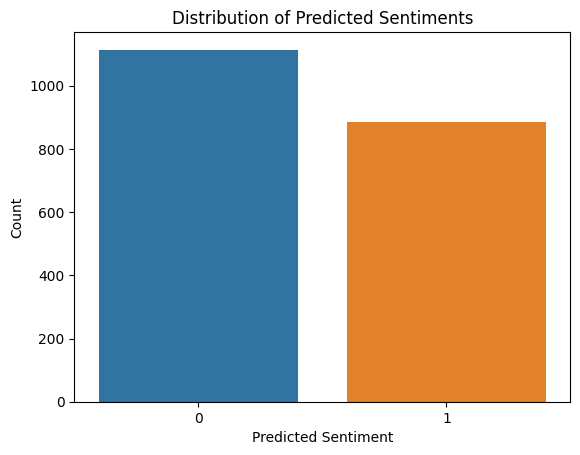

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of predicted sentiments
sns.countplot(x=y_pred)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiments')
plt.show()


**How to save and load the CAMeLBERT-CA SA model for future use?**

In [8]:
# Save the CAMeLBERT-CA SA model
sa.save_pretrained("path/to/save/directory")

# Load the saved CAMeLBERT-CA SA model
loaded_sa = pipeline('text-classification', model="path/to/save/directory")


**How to handle imbalanced classes in the sentiment analysis dataset?**

In [9]:
# Import necessary libraries
from sklearn.utils import resample
from sklearn.model_selection import train_test_split  # Don't forget to import train_test_split

# Check class distribution
class_distribution = df["label"].value_counts()

# Handle imbalanced classes (if needed)
if len(class_distribution) > 1:
    # Resample the minority class to balance the dataset
    minority_class = df[df["label"] == class_distribution.idxmin()]
    majority_class = df[df["label"] == class_distribution.idxmax()]
    minority_class_resampled = resample(minority_class, replace=True, n_samples=class_distribution.idxmax())
    df_balanced = pd.concat([majority_class, minority_class_resampled])

    # Split the balanced dataset into training and testing sets
    X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
        df_balanced["text"], df_balanced["label"], test_size=0.2, random_state=42)


**How to extract contextual embeddings using the CAMeLBERT-CA model?**

In [10]:
# Import necessary libraries
from transformers import AutoModel, AutoTokenizer

# Load CAMeLBERT-CA model and tokenizer
camelbert_ca_model_name = "CAMeL-Lab/bert-base-arabic-camelbert-ca"
tokenizer = AutoTokenizer.from_pretrained(camelbert_ca_model_name)
camelbert_ca_model = AutoModel.from_pretrained(camelbert_ca_model_name)

# Tokenize and encode text
text = "أهلاً بك في OpenAI"
tokens = tokenizer(text, return_tensors="pt")
embeddings = camelbert_ca_model(**tokens).last_hidden_state


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


**What are some examples of positive and negative tweets from the dataset?**

In [11]:
# Display examples of positive tweets
positive_samples = df[df['label'] == 1].sample(5)['text']
print("Examples of Positive Tweets:")
print(positive_samples)

# Display examples of negative tweets
negative_samples = df[df['label'] == 0].sample(5)['text']
print("\nExamples of Negative Tweets:")
print(negative_samples)


Examples of Positive Tweets:
765                                        عجل يا الله\n
385                      اللهم ارزقني كما ترزق البغاث \n
103                                               صدقت\n
305    من بغضه رب العالمين لن يحبه احد , قلوب العباد ...
864                          اسل الله ان يستجيب دعائكم\n
Name: text, dtype: object

Examples of Negative Tweets:
1226                                            قرف يقرفك
1858                        عنجد هذا الانسان تافه وحقير\n
1904                                         انا بكرهك \n
1374    انتم يا قطريه شن عارفكم السياسه انتم لاعندكم ج...
1178                                                   \n
Name: text, dtype: object


**What are the most frequent n-grams (bi-grams or tri-grams) in the dataset?**

In [16]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Function to get most frequent n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), top_k=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Get top bi-grams for positive and negative tweets
top_bi_grams_positive = get_top_ngrams(df[df['label'] == 1]['text'], ngram_range=(2, 2), top_k=10)
top_bi_grams_negative = get_top_ngrams(df[df['label'] == 0]['text'], ngram_range=(2, 2), top_k=10)

# Display top bi-grams
print("Top Bi-grams in Positive Tweets:")
print(top_bi_grams_positive)

print("\nTop Bi-grams in Negative Tweets:")
print(top_bi_grams_negative)


Top Bi-grams in Positive Tweets:
[('يا رب', 40), ('الحمد لله', 29), ('اللهم ارزقنا', 15), ('شاء الله', 12), ('يا الله', 11), ('من الله', 9), ('سبحان الله', 9), ('صباح الخير', 8), ('في الله', 8), ('بارك الله', 8)]

Top Bi-grams in Negative Tweets:
[('المفاعل النووي', 36), ('هيئة الطاقة', 13), ('الطاقة الشمسية', 11), ('الله لا', 11), ('ان المفاعل', 10), ('من المفاعل', 10), ('البعض يعتقد', 9), ('يعتقد ان', 9), ('النووي سيحل', 9), ('سيحل مشاكلنا', 9)]
